In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Step 1: Load Data
data = pd.read_csv('comprehensive_data.csv')

# Step 2: Basic Data Inspection
# Display first few rows
data.head()

# Basic information about the dataset
data.info()

# Summary statistics of numerical columns
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218899 entries, 0 to 218898
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Student_ID            218899 non-null  int64 
 1   Department_Admission  218899 non-null  int64 
 2   Department_Name       218899 non-null  object
 3   Semester_Name         218899 non-null  object
 4   Paper_ID              218899 non-null  int64 
 5   Marks                 218899 non-null  int64 
 6   Effort_Hours          218899 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 11.7+ MB


,Student_ID,Department_Admission,Paper_ID,Marks,Effort_Hours
count,2.188990e+05,218899.000000,218899.000000,218899.000000,218899.000000
mean,2.016031e+07,4175.614535,50975.037099,69.575032,8.082472
std,1.716541e+04,2458.767025,23079.989256,18.090536,2.793579
min,2.013114e+07,1096.000000,12995.000000,19.000000,2.000000
25%,2.014555e+07,1825.000000,31818.000000,54.000000,6.000000
50%,2.015965e+07,4055.000000,52434.000000,70.000000,7.000000
75%,2.017513e+07,5564.000000,71868.000000,85.000000,10.000000
max,2.018999e+07,8825.000000,89747.000000,100.000000,257.000000


Summary statistics for Marks and Effort Hours:
               Marks   Effort_Hours
count  218899.000000  218899.000000
mean       69.575032       8.082472
std        18.090536       2.793579
min        19.000000       2.000000
25%        54.000000       6.000000
50%        70.000000       7.000000
75%        85.000000      10.000000
max       100.000000     257.000000


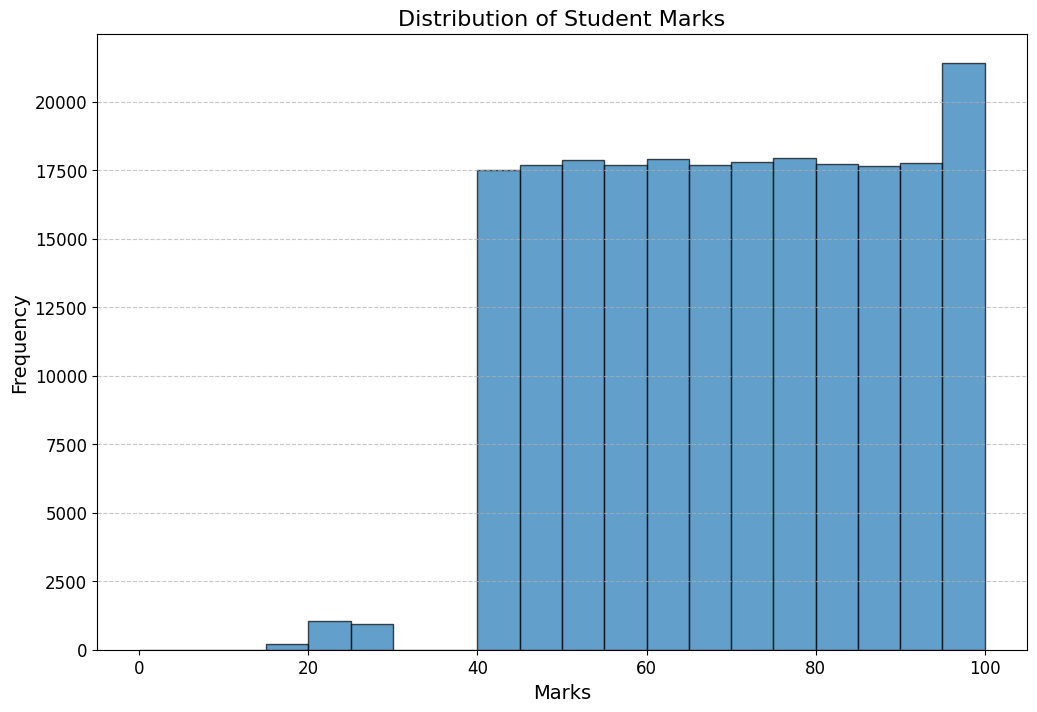

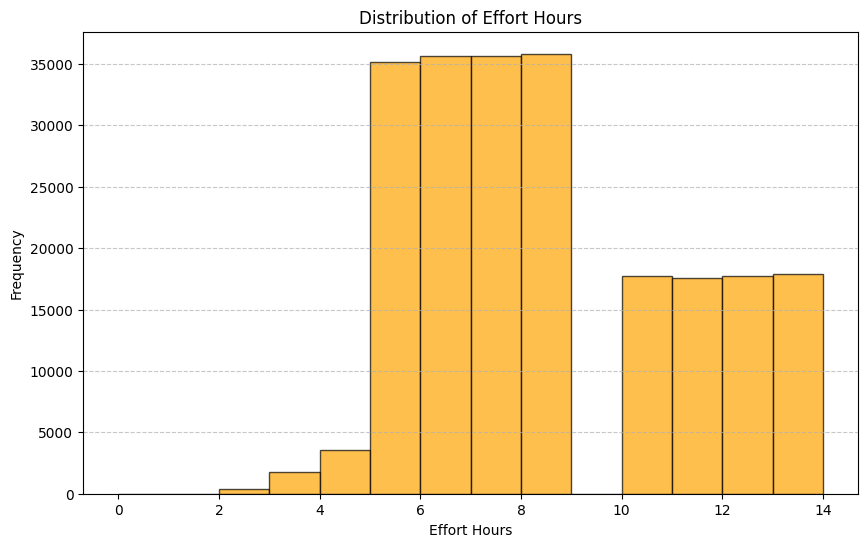

In [3]:
# Step 3: Summary Statistics
# Summary statistics for 'Marks' and 'Effort_Hours'
print("Summary statistics for Marks and Effort Hours:")
print(data[['Marks', 'Effort_Hours']].describe())

# Step 4: Data Visualizations
# Marks Distribution
plt.figure(figsize=(12, 8))
plt.hist(data['Marks'], bins=range(0, 101, 5), alpha=0.7, edgecolor='black')
plt.xlabel('Marks', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Student Marks', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Effort Hours Distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Effort_Hours'], bins=range(0, 15, 1), alpha=0.7, color='orange', edgecolor='black', range=(0, 20))
plt.xlabel('Effort Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Effort Hours')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Correlation between Effort Hours and Marks: 0.95


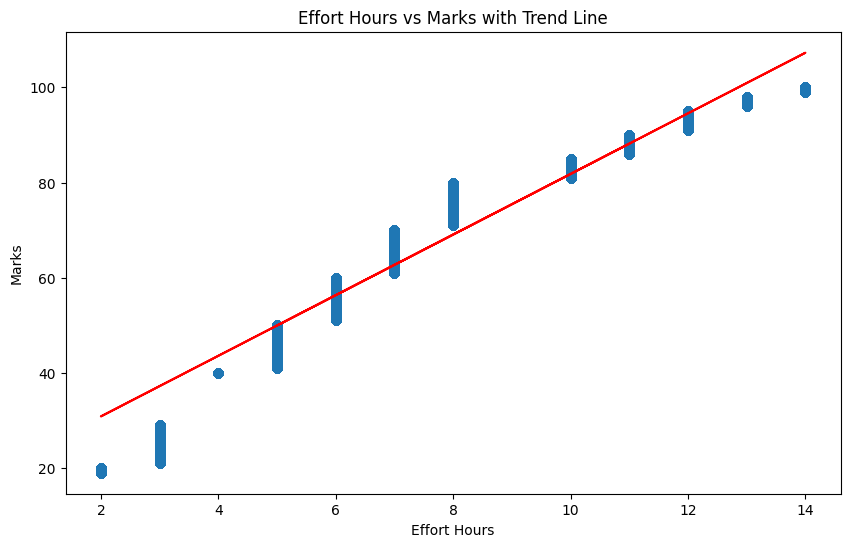

In [6]:
# Step 5: Correlation Analysis
# Calculate Pearson correlation
correlation, p_value = stats.pearsonr(data['Effort_Hours'], data['Marks'])
print(f"Correlation between Effort Hours and Marks: {correlation:.2f}")

# Scatter Plot with Trend Line
data_filtered = data[(data['Effort_Hours'] >= 0) & (data['Effort_Hours'] <= 20)]
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['Effort_Hours'], data_filtered['Marks'], alpha=0.7)
plt.xlabel('Effort Hours')
plt.ylabel('Marks')
plt.title('Effort Hours vs Marks with Trend Line')

# Add trend line
slope, intercept, r_value, p_value, std_err = stats.linregress(data_filtered['Effort_Hours'], data_filtered['Marks'])
plt.plot(data_filtered['Effort_Hours'], slope * data_filtered['Effort_Hours'] + intercept, color='red')
plt.show()


Highest Average Marks: Sophisticated Analytical Instrument Facility (SAIF) - 70.08
Lowest Average Marks: Mechanical Engineering - 68.78


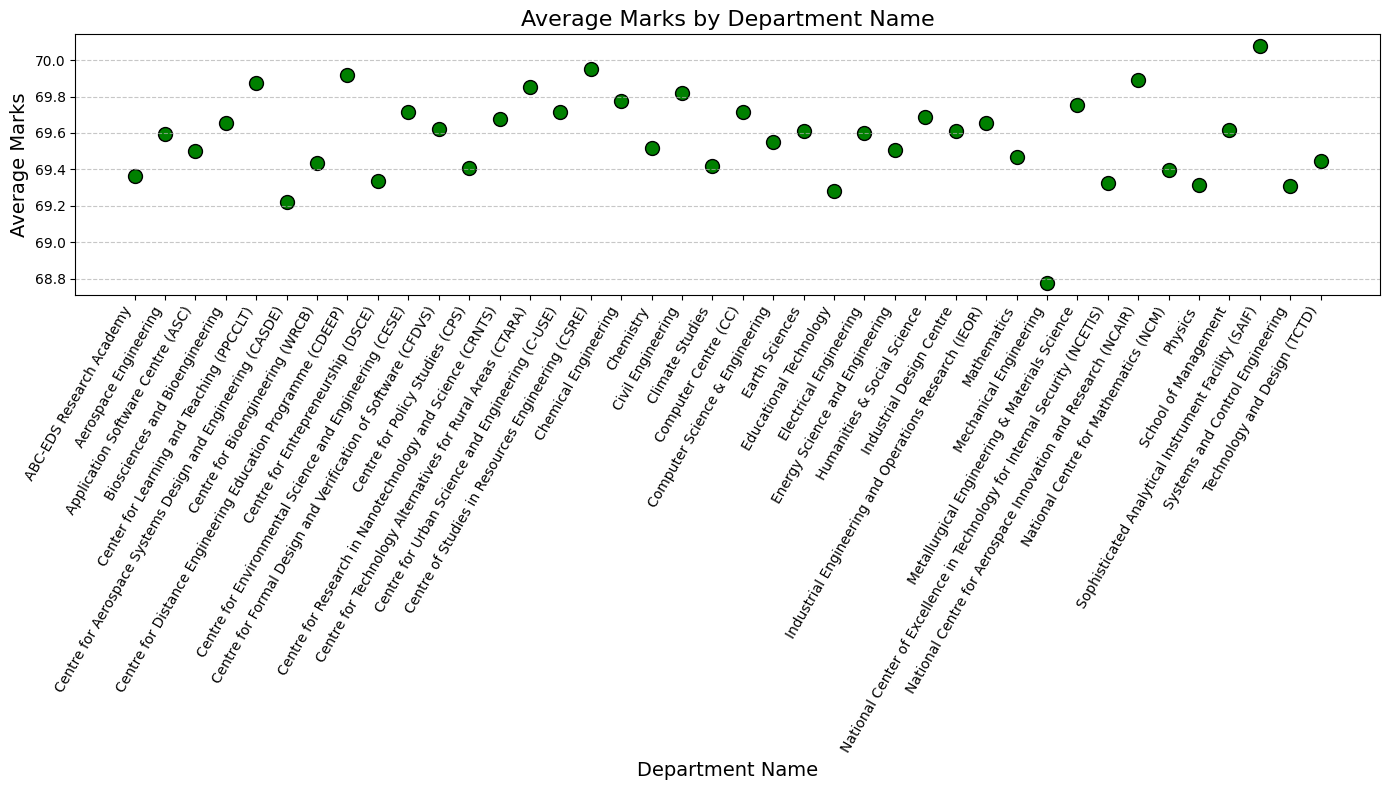

Highest Average Effort Hours: Centre for Environmental Science and Engineering (CESE) - 8.15
Lowest Average Effort Hours: Mechanical Engineering - 7.97


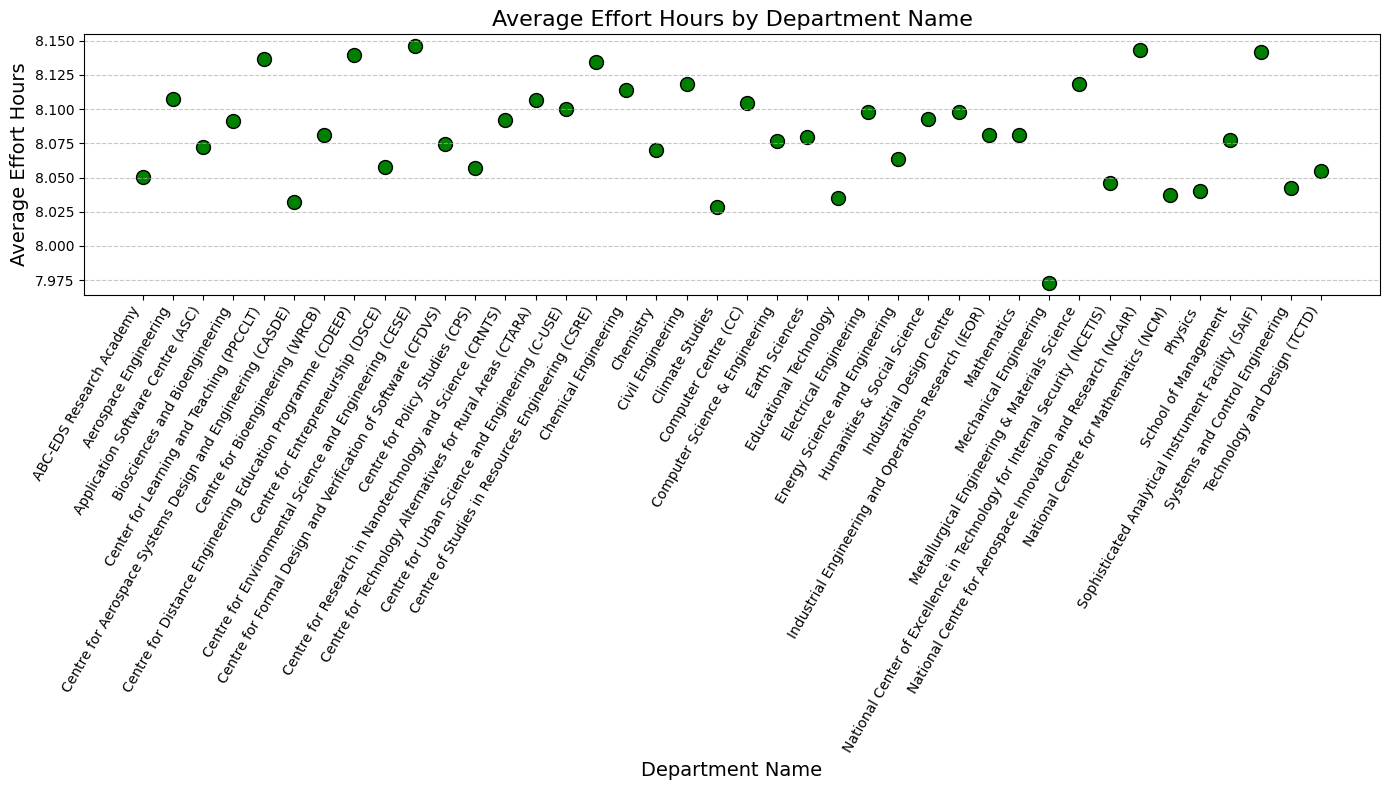

In [ ]:
# Step 6: Group Comparisons
# Average Marks by Department Name

avg_marks_department = data.groupby('Department_Name')['Marks'].mean()
highest_avg_marks_department = avg_marks_department.idxmax()
lowest_avg_marks_department = avg_marks_department.idxmin()

print(f"Highest Average Marks: {highest_avg_marks_department} - {avg_marks_department[highest_avg_marks_department]:.2f}")
print(f"Lowest Average Marks: {lowest_avg_marks_department} - {avg_marks_department[lowest_avg_marks_department]:.2f}")


plt.figure(figsize=(14, 8))
plt.scatter(avg_marks_department.index, avg_marks_department.values, color='green', s=100, edgecolor='black')
plt.xlabel('Department Name', fontsize=14)
plt.ylabel('Average Marks', fontsize=14)
plt.title('Average Marks by Department Name', fontsize=16)
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Average Effort by Department Name
avg_hours_department = data.groupby('Department_Name')['Effort_Hours'].mean()
highest_avg_hours_department = avg_hours_department.idxmax()
lowest_avg_hours_department = avg_hours_department.idxmin()

print(f"Highest Average Effort Hours: {highest_avg_hours_department} - {avg_hours_department[highest_avg_hours_department]:.2f}")
print(f"Lowest Average Effort Hours: {lowest_avg_hours_department} - {avg_hours_department[lowest_avg_hours_department]:.2f}")

plt.figure(figsize=(14, 8))
plt.scatter(avg_hours_department.index, avg_hours_department.values, color='green', s=100, edgecolor='black')
plt.xlabel('Department Name', fontsize=14)
plt.ylabel('Average Effort Hours', fontsize=14)
plt.title('Average Effort Hours by Department Name', fontsize=16)
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Highest Average Marks by Semester: Sem_1 - 69.72
Lowest Average Marks by Semester: Sem_2 - 69.40


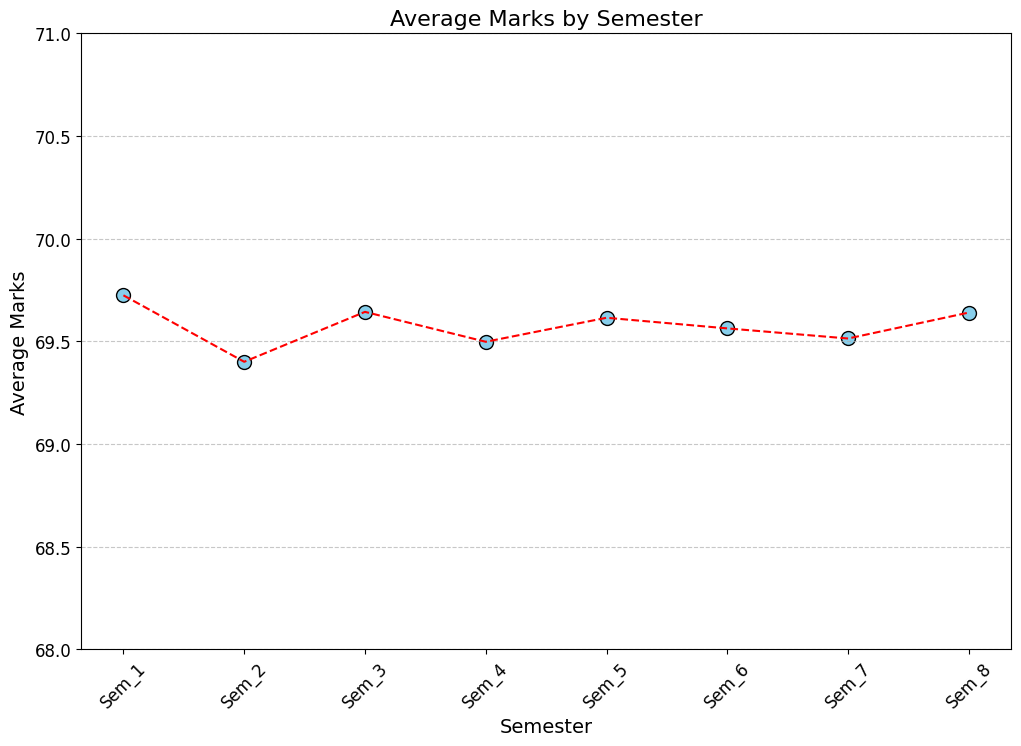

Highest Average Effort Hours by Semester: Sem_8 - 8.11
Lowest Average Effort Hours by Semester: Sem_2 - 8.06


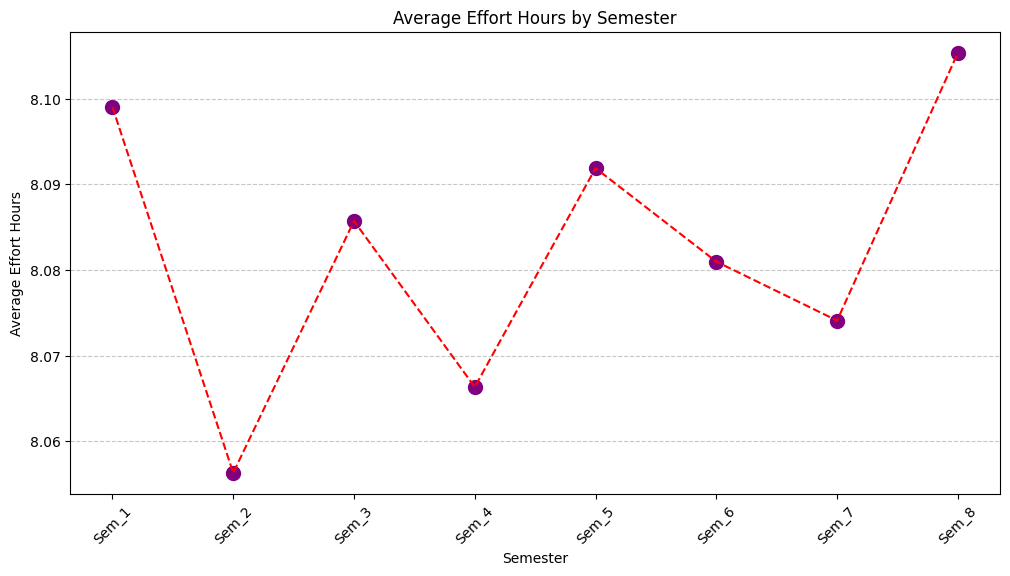

In [10]:

# Average Marks by Semester
avg_marks_semester = data.groupby('Semester_Name')['Marks'].mean()

# Find the highest and lowest average marks by semester
highest_avg_marks_semester = avg_marks_semester.idxmax()
lowest_avg_marks_semester = avg_marks_semester.idxmin()

print(f"Highest Average Marks by Semester: {highest_avg_marks_semester} - {avg_marks_semester[highest_avg_marks_semester]:.2f}")
print(f"Lowest Average Marks by Semester: {lowest_avg_marks_semester} - {avg_marks_semester[lowest_avg_marks_semester]:.2f}")

plt.figure(figsize=(12, 8))
plt.scatter(avg_marks_semester.index, avg_marks_semester.values, color='skyblue', s=100, edgecolor='black')
plt.plot(avg_marks_semester.index, avg_marks_semester.values, color='red', linestyle='--')
plt.xlabel('Semester', fontsize=14)
plt.ylabel('Average Marks', fontsize=14)
plt.title('Average Marks by Semester', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(68, 71)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Average Effort Hours by Semester
avg_effort_semester = data.groupby('Semester_Name')['Effort_Hours'].mean()

# Find the highest and lowest average effort hours by semester
highest_avg_effort_semester = avg_effort_semester.idxmax()
lowest_avg_effort_semester = avg_effort_semester.idxmin()

print(f"Highest Average Effort Hours by Semester: {highest_avg_effort_semester} - {avg_effort_semester[highest_avg_effort_semester]:.2f}")
print(f"Lowest Average Effort Hours by Semester: {lowest_avg_effort_semester} - {avg_effort_semester[lowest_avg_effort_semester]:.2f}")

plt.figure(figsize=(12, 6))
plt.scatter(avg_effort_semester.index, avg_effort_semester.values, color='purple', s=100)
plt.plot(avg_effort_semester.index, avg_effort_semester.values, color='red', linestyle='--')
plt.xlabel('Semester')
plt.ylabel('Average Effort Hours')
plt.title('Average Effort Hours by Semester')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
